In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from tqdm import tqdm
from glob import glob
import csv
import sys
# from transformers.tokenization_bert import BertTokenizer
from processor import NERProcessor
from transformers import AutoModel, AutoTokenizer, PhobertTokenizer

In [2]:
# tokenizer = AutoTokenizer.from_pretrained("model/tokenizer")
processor = NERProcessor("data", tokenizer)
all_data = processor.get_example("train")
features = processor.convert_examples_to_features(all_data, 126)

HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /model/tokenizer/resolve/main/config.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1091)')))


OSError: Can't load config for 'model/tokenizer'. Make sure that:

- 'model/tokenizer' is a correct model identifier listed on 'https://huggingface.co/models'
  (make sure 'model/tokenizer' is not a path to a local directory with something else, in that case)

- or 'model/tokenizer' is the correct path to a directory containing a config.json file



In [ ]:
# !mkdir model
# tokenizer.save_pretrained('model/tokenizer')

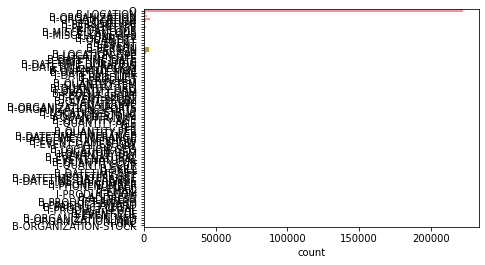

In [6]:
import pandas as pd
from collections import Counter
import seaborn as sns



data_df = pd.read_csv('data/NER_2021.csv')
all_tag = data_df['Tag'].to_list()
label_counter = Counter(all_tag)


In [7]:
all_tag[:10]

['O', 'O', 'O', 'O', 'O', 'O', 'B-LOCATION', 'O', 'O', 'O']

In [24]:
# label_counter

Counter({'O': 28614,
         'B-LOC': 484,
         'B-ORG': 144,
         'I-LOC': 311,
         'B-PER': 606,
         'I-PER': 363,
         'I-ORG': 294,
         'B-MISC': 18,
         'I-MISC': 21})

In [17]:
label_counter_in_percent = [(i, label_counter[i] / len(all_labels)) for i, count in label_counter.most_common()]

for label, percent in label_counter_in_percent:
    print('{} - {:.3f}%'.format(label, percent*100.0))

O - 92.737%
B-PER - 1.964%
B-LOC - 1.569%
I-PER - 1.176%
I-LOC - 1.008%
I-ORG - 0.953%
B-ORG - 0.467%
I-MISC - 0.068%
B-MISC - 0.058%
